In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../datos/api_rent_madrid.csv", sep=";")

In [3]:
df.columns

Index(['propertyCode', 'numPhotos', 'price', 'propertyType', 'operation',
       'size', 'exterior', 'rooms', 'bathrooms', 'address', 'province',
       'municipality', 'country', 'latitude', 'longitude', 'showAddress',
       'distance', 'description', 'hasVideo', 'status', 'newDevelopment',
       'priceByArea', 'detailedType', 'suggestedTexts', 'hasPlan', 'has3DTour',
       'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment',
       'externalReference', 'floor', 'district', 'neighborhood', 'hasLift',
       'parkingSpace', 'labels', 'newDevelopmentFinished'],
      dtype='object')

In [4]:
df["operation"].unique()

array(['rent'], dtype=object)

### Empiezo decidiendo que columnas NO tienen lugar en mi analisis
-Tras comprender los datos, he decidido no incluir las siguientes columnas: `hasVideo`, `has3DTour`, `superTopHighlight` , `topNewDevelopment`, `numPhotos` y `description`

In [5]:
columnas_a_eliminar = ['has3DTour', 'superTopHighlight', 'topNewDevelopment', 'numPhotos', 'description']

df_interesante = df.drop(columns=columnas_a_eliminar)

### Ahora, quiero separar las propiedades por provincia, ya que el comportamiento de los mercados son diferentes en las diferentes provincias.

In [6]:
df["province"].unique()

array(['Toledo', 'Madrid', 'Guadalajara', 'Segovia', 'Ávila'],
      dtype=object)

In [7]:
df_madrid = pd.DataFrame()
df_guadalajara = pd.DataFrame()
df_toledo = pd.DataFrame()
df_segovia = pd.DataFrame()
df_avila = pd.DataFrame()

for index, row in df_interesante.iterrows():
    if row['province'] == 'Madrid':
        df_madrid = pd.concat([df_madrid, pd.DataFrame([row])], ignore_index=True)
    elif row['province'] == 'Guadalajara':
        df_guadalajara = pd.concat([df_guadalajara, pd.DataFrame([row])], ignore_index=True)
    elif row['province'] == 'Toledo':
        df_toledo = pd.concat([df_toledo, pd.DataFrame([row])], ignore_index=True)
    elif row['province'] == 'Segovia':
        df_segovia = pd.concat([df_segovia, pd.DataFrame([row])], ignore_index=True)
    elif row['province'] == 'Ávila':
        df_avila = pd.concat([df_avila, pd.DataFrame([row])], ignore_index=True)

print(f"df_madrid tiene {df_madrid.shape[0]} vicviendas en alquiler")
print(f"df_guadalajara tiene {df_guadalajara.shape[0]} viviendas en alquiler")
print(f"df_toledo tiene {df_toledo.shape[0]} viviendas en alquiler")
print(f"df_segovia tiene {df_segovia.shape[0]} viviendas en alquiler")
print(f"df_avila tiene {df_avila.shape[0]} viviendas en alquiler")


df_madrid tiene 358 vicviendas en alquiler
df_guadalajara tiene 21 viviendas en alquiler
df_toledo tiene 62 viviendas en alquiler
df_segovia tiene 8 viviendas en alquiler
df_avila tiene 1 viviendas en alquiler


<div style="background-color: #FFBB33; padding: 10px; border-left: 6px solid #000080; color: black; border-radius: 10px;">
Decido centrar mi analisis en las siguientes provincias: Madrid y Guadalajara, la decisión la tomo por la poca cantidad de datos recibidos en el resto de provincias 
</div>

### Identificamos donde tengo la mayor concentración de nulos

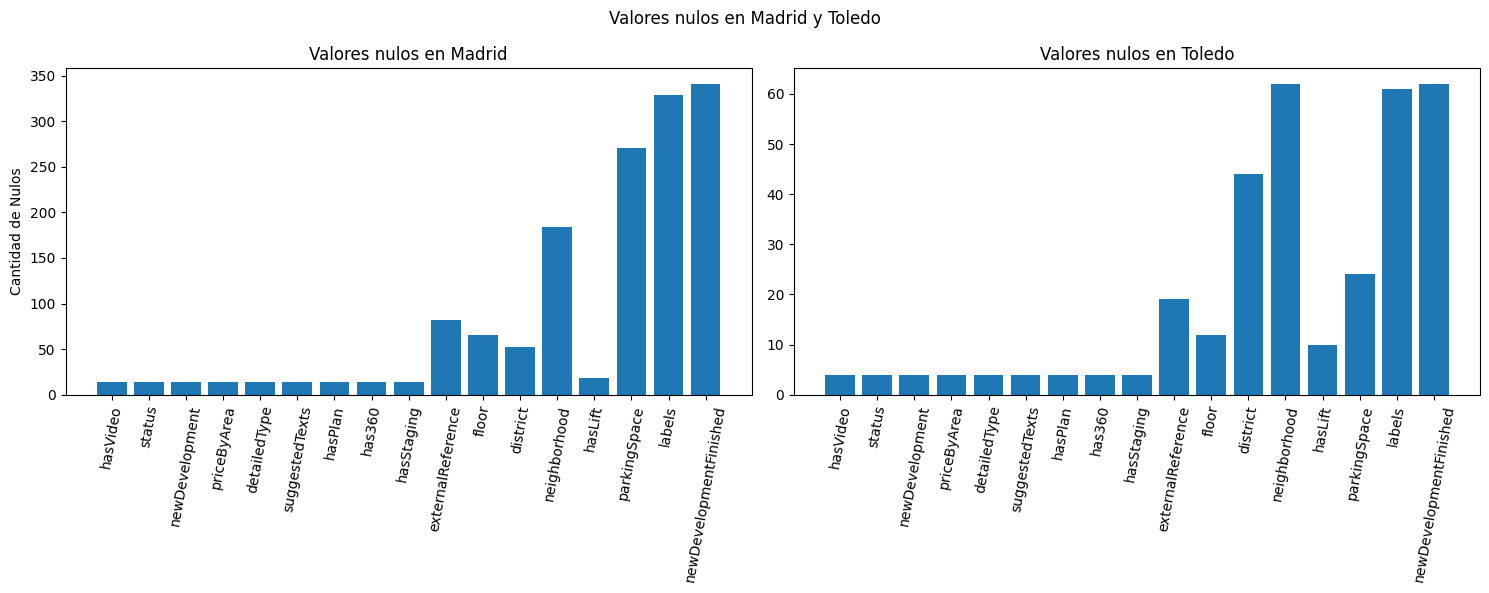

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Valores nulos para Madrid
nulos_madrid = df_madrid.isnull().sum()
nulos_madrid = nulos_madrid[nulos_madrid > 0]
if not nulos_madrid.empty:
    axes[0].bar(nulos_madrid.index, nulos_madrid.values)
    axes[0].set_title("Valores nulos en Madrid")
    axes[0].set_xticks(range(len(nulos_madrid.index)))
    axes[0].set_xticklabels(nulos_madrid.index, rotation=80)
    axes[0].set_ylabel("Cantidad de Nulos")

# Valores nulos para Toledo
nulos_toledo = df_toledo.isnull().sum()
nulos_toledo = nulos_toledo[nulos_toledo > 0]
if not nulos_toledo.empty:
    axes[1].bar(nulos_toledo.index, nulos_toledo.values)
    axes[1].set_title("Valores nulos en Toledo")
    axes[1].set_xticks(range(len(nulos_toledo.index)))
    axes[1].set_xticklabels(nulos_toledo.index, rotation=80)

fig.suptitle("Valores nulos en Madrid y Toledo")
plt.tight_layout()
plt.show()


Podemos ver como se concentran los nulos en los diferentes dataframes, teniendo una distribución parecida entre unos y otros, a simple vista podemos observar que hay varias columnas que tienen un porcentaje de nulos bastante alto.
> Importante recalcar que en la grafica solo aparecen las columnas que contienen nulos.

In [9]:
porcentaje_nulos_madrid = df_madrid.isnull().mean() * 100
porcentaje_nulos_madrid = porcentaje_nulos_madrid[porcentaje_nulos_madrid > 0]

porcentaje_nulos_toledo = df_toledo.isnull().mean() * 100
porcentaje_nulos_toledo = porcentaje_nulos_toledo[porcentaje_nulos_toledo > 0]

porcentaje_nulos_madrid_df = porcentaje_nulos_madrid.reset_index()
porcentaje_nulos_madrid_df.columns = ['Columna', 'Porcentaje_Nulos']

porcentaje_nulos_toledo_df = porcentaje_nulos_toledo.reset_index()
porcentaje_nulos_toledo_df.columns = ['Columna', 'Porcentaje_Nulos']

print("Porcentaje de Nulos en Madrid:")
display(porcentaje_nulos_madrid_df)

print("\nPorcentaje de Nulos en Toledo:")
display(porcentaje_nulos_toledo_df)


Porcentaje de Nulos en Madrid:


,Columna,Porcentaje_Nulos
0,hasVideo,3.910615
1,status,3.910615
2,newDevelopment,3.910615
3,priceByArea,3.910615
4,detailedType,3.910615
5,suggestedTexts,3.910615
6,hasPlan,3.910615
7,has360,3.910615
8,hasStaging,3.910615
9,externalReference,22.905028



Porcentaje de Nulos en Toledo:


,Columna,Porcentaje_Nulos
0,hasVideo,6.451613
1,status,6.451613
2,newDevelopment,6.451613
3,priceByArea,6.451613
4,detailedType,6.451613
5,suggestedTexts,6.451613
6,hasPlan,6.451613
7,has360,6.451613
8,hasStaging,6.451613
9,externalReference,30.645161


<div style="background-color: #FFBB33; padding: 10px; border-left: 6px solid #000080; color: black; border-radius: 10px;">
Las columnas que tienen un porcentaje de nulos mayor al 40% no las incluire en el analisis.
</div>

In [10]:
eliminar_toledo = ["neighborhood", "newDevelopmentFinished", "labels", "district", "externalReference"]
eliminar_madrid = ["neighborhood", "parkingSpace", "newDevelopmentFinished", "labels"]

df_madrid_2 = df_madrid.drop(columns=eliminar_madrid, errors="ignore")
df_toledo_2 = df_toledo.drop(columns=eliminar_toledo, errors="ignore")

print("Madrid:")
display(df_madrid_2.head())

print("Toledo:")
display(df_toledo_2.head())

Madrid:


,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,...,priceByArea,detailedType,suggestedTexts,hasPlan,has360,hasStaging,externalReference,floor,district,hasLift
0,91615378,750.0,flat,rent,60.0,True,1,1,"Calle de Alejandro Villegas, 23",Madrid,...,13.0,{'typology': 'flat'},"{'subtitle': 'Canillas, Madrid', 'title': 'Pis...",0.0,0.0,0.0,AV23,3,Hortaleza,1.0
1,88363329,750.0,flat,rent,70.0,True,2,1,Gregorio izquierdo,Madrid,...,11.0,{'typology': 'flat'},"{'subtitle': 'Centro Urbano, San Sebastián de ...",1.0,0.0,0.0,NaN,bj,Centro Urbano,0.0
2,98621753,400.0,penthouse,rent,67.0,True,2,2,Calle Madrid,Madrid,...,6.0,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Villamanrique de Tajo', 'title':...",0.0,1.0,0.0,90004,2,NaN,0.0
3,98568766,590.0,flat,rent,70.0,True,3,2,Rascafría,Madrid,...,8.0,{'typology': 'flat'},"{'subtitle': 'Rascafría', 'title': 'Piso'}",0.0,0.0,0.0,2539,NaN,NaN,0.0
4,98323777,684.0,studio,rent,45.0,True,0,1,"Av. José Antonio Corrales, 2",Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Toledo:


,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,...,newDevelopment,priceByArea,detailedType,suggestedTexts,hasPlan,has360,hasStaging,floor,hasLift,parkingSpace
0,98903350,550.0,chalet,rent,371.0,False,6,3,Numancia de la Sagra,Toledo,...,0.0,1.0,"{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Numancia de la Sagra', 'title': ...",0.0,0.0,0.0,NaN,NaN,NaN
1,98222714,450.0,flat,rent,89.0,False,2,1,Calle Arroyo,Toledo,...,0.0,5.0,{'typology': 'flat'},"{'subtitle': 'Recas', 'title': 'Piso en Calle ...",0.0,0.0,0.0,2,1.0,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
2,98027143,450.0,flat,rent,60.0,True,2,1,Calle Arena,Toledo,...,0.0,8.0,{'typology': 'flat'},"{'subtitle': 'Cedillo del Condado', 'title': '...",0.0,0.0,0.0,1,False,NaN
3,98871157,550.0,flat,rent,90.0,True,3,1,El Viso de San Juan,Toledo,...,0.0,6.0,{'typology': 'flat'},"{'subtitle': 'El Viso de San Juan', 'title': '...",0.0,0.0,0.0,2,False,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
4,81435390,400.0,penthouse,rent,70.0,True,2,1,Camarena,Toledo,...,0.0,6.0,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Camarena', 'title': 'Ático'}",0.0,0.0,0.0,2,True,NaN


#### Pasamos a guardarlos para poder hacer un analisis más exaustivo de cada DF.

In [11]:
df_madrid_2.to_csv("../datos/madrid_interesante.csv")
df_toledo_2.to_csv("../datos/toledo_interesante.csv")